# Pr√©diction des taux directeurs √† l'aide des discours de la FED

## I - EDA

### 1 - Librairies

In [1]:
pip install gensim==4.3.0 scipy==1.9.3

In [2]:
pip install xgboost

In [3]:
pip install datasets evaluate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.2/491.2 kB 27.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 7.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 8.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Foun

In [4]:
pip install transformers[torch]

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 34.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
pip install datasets optuna "ray[tune]" evaluate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 23.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 19.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 101.7/101.7 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68.1/68.1 MB 11.7 MB/s eta 0:00:00


In [ ]:
#from google.colab import drive
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Zoom EDA
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

#Nettoyage
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Mod√©lisation bas√©e sur repr√©sentation vectorielle TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score,precision_recall_fscore_support

##Mod√®le TF-IDF + MNB
from sklearn.naive_bayes import MultinomialNB

##Mod√®le LR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

##Mod√®le SVM
from sklearn.svm import SVC

#Mod√©lisation bas√©e sur embeddings Word2Vec
import gensim.downloader as api
from xgboost import XGBClassifier

#Mod√®les neuronaux

##FinBERT
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset
import evaluate
from transformers import EarlyStoppingCallback
from ray import tune

c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-24 18:40:05,571	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-24 18:40:06,082	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### 2 - Data importation

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

Mounted at /content/drive


#### Charger les donn√©es en local

In [ ]:
path_96_20 = r"DATA\fed_speeches_1996_2020.csv"
df = pd.read_csv(path_96_20)

In [ ]:
path_rates = r'DATA\fed_speeches_1996_2024.csv'
df_rates = pd.read_csv(path_rates)

#### Charger les donn√©es depuis drive

In [ ]:
"""path_96_20 = r"/content/drive/MyDrive/NLP/DATA/fed_speeches_1996_2024.csv"
df = pd.read_csv(path_96_20)"""

In [ ]:
"""path_rates = r'/content/drive/MyDrive/NLP/DATA/FEDFUNDS.csv'
df_rates = pd.read_csv(path_rates)"""

### 3 - Statistiques globales

In [ ]:
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1821 non-null   object
 1   title    1822 non-null   object
 2   speaker  1820 non-null   object
 3   text     1823 non-null   object
dtypes: object(4)
memory usage: 57.1+ KB
None
date       1508
title      1562
speaker      43
text       1815
dtype: int64


In [ ]:
print(df_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  362 non-null    object 
 1   FEDFUNDS          362 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


### 4 - Data transformation

#### Format dates

In [4]:
def preprocess_dates(df, df_rates):

    df = df.dropna(subset=["date"]).copy()
    df["date"] = pd.to_datetime(df["date"], errors='coerce')
    df["date_cible"] = df["date"] + pd.offsets.MonthBegin(1)
    df = df.rename(columns={"date": "date_speech"})
    df_rates["observation_date"] = pd.to_datetime(df_rates["observation_date"])

    return df, df_rates

In [ ]:
df, df_rates= preprocess_dates(df, df_rates)

In [ ]:
df.head(2)

date_speech                                         title  \
0  1996-06-13           Bank supervision in a world economy   
1  1996-06-18  Developments in electronic money and banking   

                          speaker  \
0         Chairman Alan Greenspan   
1  Governor Edward W. Kelley, Jr.   

                                                text date_cible  
0  Remarks by Chairman Alan Greenspan Bank superv... 1996-07-01  
1  Remarks by Governor Edward W. Kelley, Jr. Deve... 1996-07-01

#### Lab√©lisation

In [6]:
def process_fedfunds(df_rates):

    df_rates["Diff"] = df_rates["FEDFUNDS"].diff()
    df_rates["FEDFUNDS_classes"] = df_rates["Diff"].apply(
        lambda x: "Augmentation" if x > 0 else ("Baisse" if x < 0 else "Stable"))
    df_rates = pd.get_dummies(df_rates, columns=["FEDFUNDS_classes"], prefix="FEDFUNDS")
    fedfunds_cols = [col for col in df_rates.columns if col.startswith("FEDFUNDS_")]
    df_rates[fedfunds_cols] = df_rates[fedfunds_cols].astype(int)
    df_rates = df_rates.dropna(subset=["Diff"])
    mean_diff = df_rates["Diff"].mean()
    print(f"Moyenne des variations du taux directeur : {mean_diff:.4f}")

    return df_rates


In [7]:
df_rates = process_fedfunds(df_rates)

Moyenne des variations du taux directeur : -0.0033


**Visualisation de l'√©volution des taux directeurs de la FED**

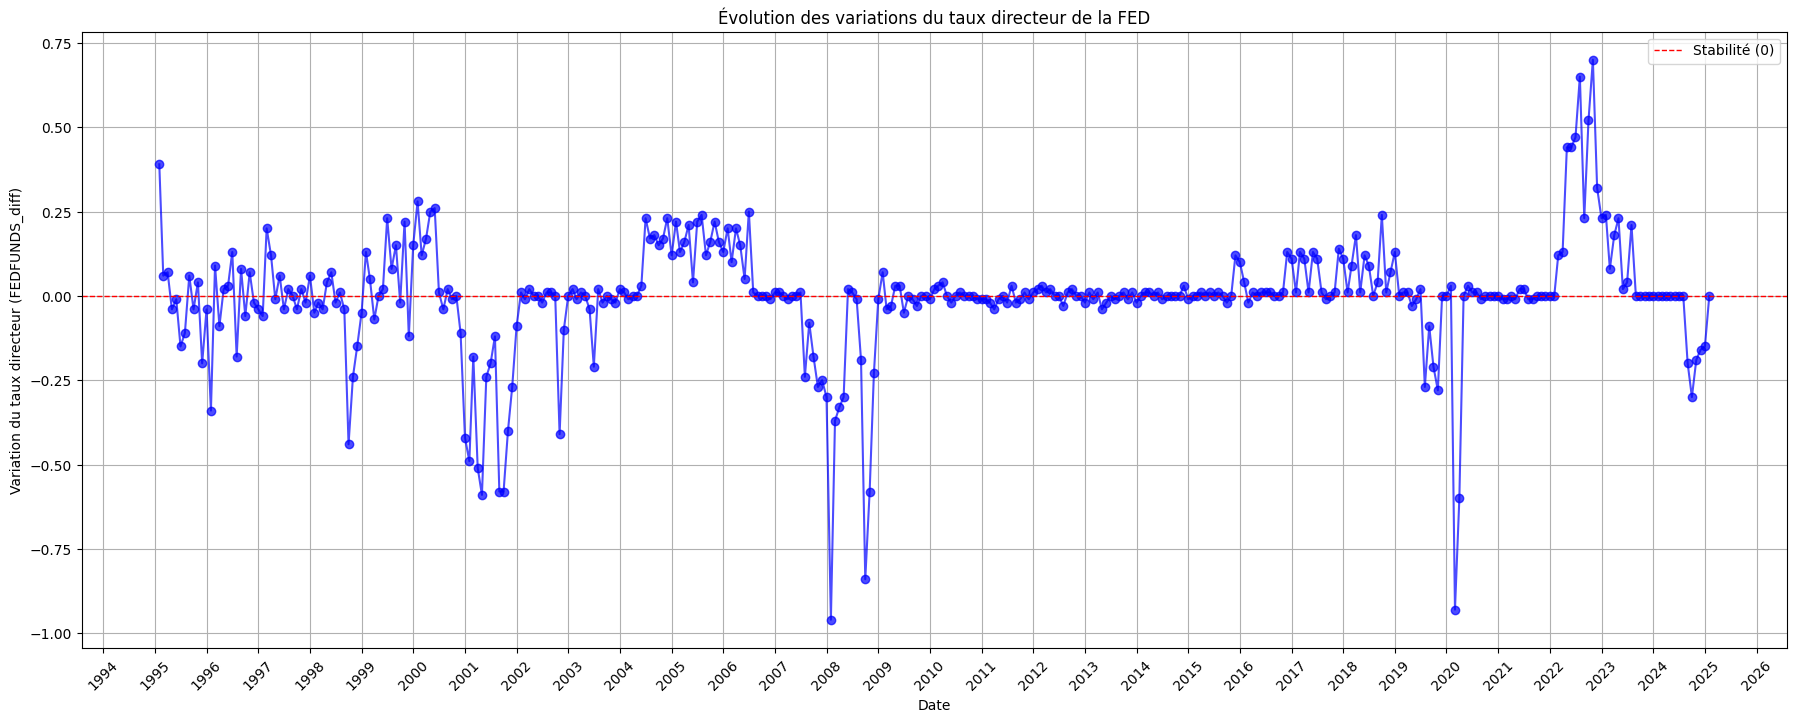

In [23]:
plt.figure(figsize=(22, 8))
plt.plot(df_rates["observation_date"], df_rates["Diff"], marker="o", linestyle="-", color="b", alpha=0.7)
plt.axhline(0, color="red", linestyle="dashed", linewidth=1, label="Stabilit√© (0)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xlabel("Date")
plt.ylabel("Variation du taux directeur (FEDFUNDS_diff)")
plt.title("√âvolution des variations du taux directeur de la FED")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


**Distribution des classes**

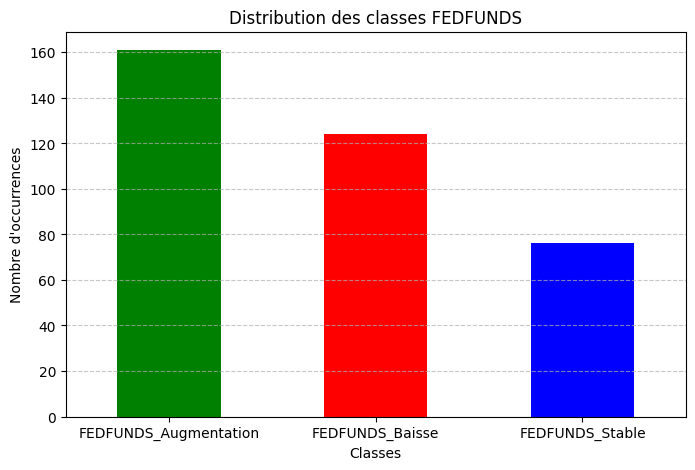

In [ ]:
class_counts = df_rates[["FEDFUNDS_Augmentation", "FEDFUNDS_Baisse", "FEDFUNDS_Stable"]].sum()

plt.figure(figsize=(8, 5))
class_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.xlabel("Classes")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes FEDFUNDS")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 5 - Concat√©nation des dataframes

In [8]:
df_merged= pd.merge(df, df_rates, left_on="date_cible", right_on="observation_date", how="inner")
df_merged.drop(columns=["observation_date"], inplace=True)
df= df_merged

In [ ]:
df.shape

(1821, 10)

### 6 - Zoom EDA

#### Fr√©quence stopwords corpus complet

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def get_most_frequent_words(texts, stop_words):
    all_words = []
    for text in texts:
        words = re.findall(r'\b\w+\b', str(text).lower())
        filtered_words = [word for word in words if word not in stop_words]  # Supprime les stopwords
        all_words.extend(filtered_words)

    return Counter(all_words).most_common(20)  # Retourne les 20 mots les plus fr√©quents
common_words= get_most_frequent_words(df["text"], stop_words)

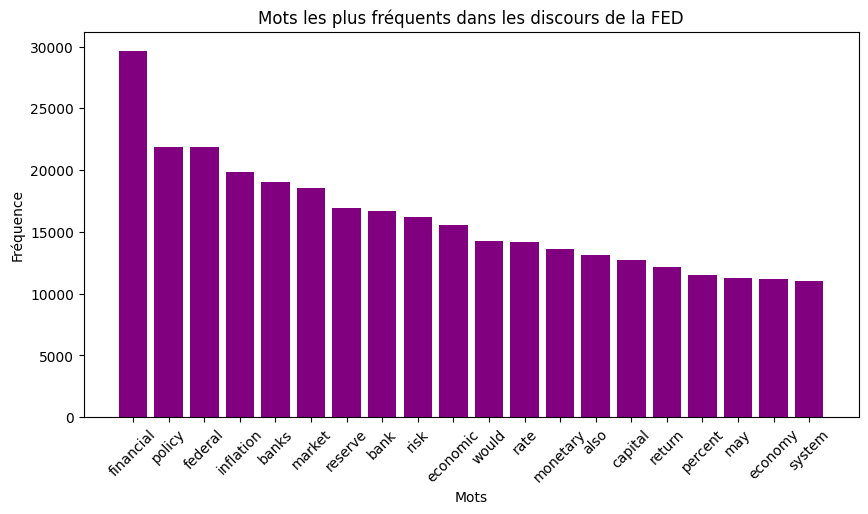

In [11]:
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="purple")
plt.xlabel("Mots")
plt.ylabel("Fr√©quence")
plt.title("Mots les plus fr√©quents dans les discours de la FED")
plt.xticks(rotation=45)
plt.show()

#### Fr√©quence stopwords par classe

In [ ]:
texts_augmentation= df[df["FEDFUNDS_Augmentation"] == 1]["text"]
texts_baisse= df[df["FEDFUNDS_Baisse"] == 1]["text"]
texts_stable= df[df["FEDFUNDS_Stable"] == 1]["text"]

def get_top_words(texts, stop_words, top_n=20):
    all_words = []
    for text in texts.dropna():
        words = re.findall(r'\b\w+\b', text.lower())
        filtered_words = [word for word in words if word not in stop_words]
        all_words.extend(filtered_words)

    return Counter(all_words).most_common(top_n)

top_words_augmentation = get_top_words(texts_augmentation, stop_words)
top_words_baisse = get_top_words(texts_baisse, stop_words)
top_words_stable = get_top_words(texts_stable, stop_words)

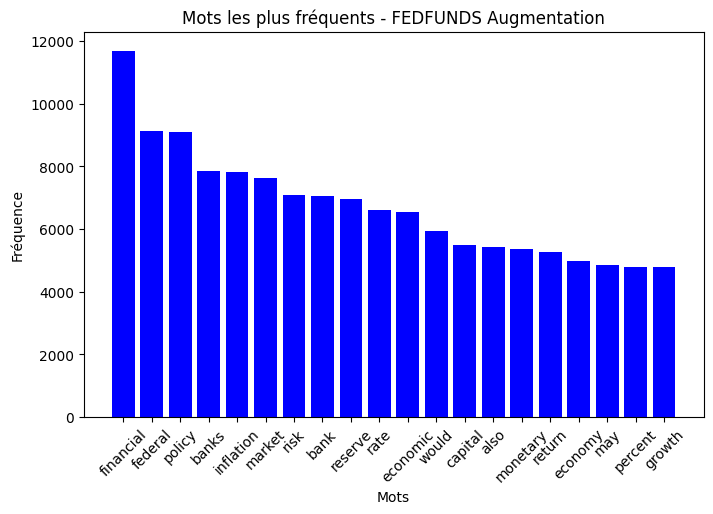

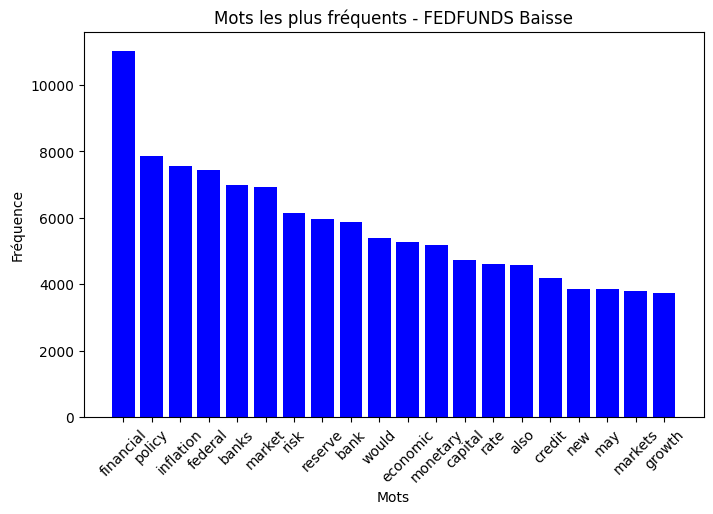

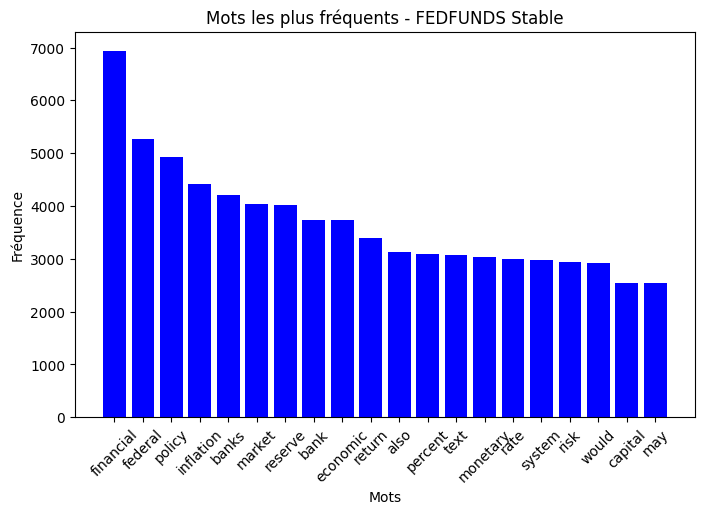

In [ ]:
def plot_top_words(top_words, title):
    words, counts = zip(*top_words)

    plt.figure(figsize=(8, 5))
    plt.bar(words, counts, color="blue")
    plt.xlabel("Mots")
    plt.ylabel("Fr√©quence")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(top_words_augmentation, "Mots les plus fr√©quents - FEDFUNDS Augmentation")
plot_top_words(top_words_baisse, "Mots les plus fr√©quents - FEDFUNDS Baisse")
plot_top_words(top_words_stable, "Mots les plus fr√©quents - FEDFUNDS Stable")

## II - Mod√©lisation

### 1 - Etat de l'art

#### 1. Mod√®les bas√©s sur des repr√©sentations vectorielles

##### Na√Øve Bayes (NB) :
Les mod√®les Na√Øve Bayes, comme le **Multinomial Na√Øve Bayes**, s‚Äôappuient sur la r√®gle de Bayes et supposent l‚Äôind√©pendance conditionnelle des mots. Malgr√© cette hypoth√®se simplificatrice, ces mod√®les sont performants sur de petits corpus et avec des repr√©sentations telles que **Bag-of-Words (BoW)** ou **TF-IDF**.  

- **Avantages** : rapide, robuste sur des donn√©es limit√©es  
- **Limites** : forte d√©pendance √† l‚Äôhypoth√®se d‚Äôind√©pendance des mots  

##### R√©gression Logistique (LR)  
Approche lin√©aire qui optimise une fonction logistique pour classifier les textes. Son efficacit√© d√©pend fortement de la qualit√© des repr√©sentations vectorielles utilis√©es (**TF-IDF, BoW**). Elle est souvent plus performante que Na√Øve Bayes lorsque les relations entre mots sont plus complexes.  

- **Avantages** : interpr√©table, efficace sur des corpus de taille moyenne  
- **Limites** : lin√©arit√©, sensible aux donn√©es bruit√©es  

##### Support Vector Machines (SVM)
Les SVM sont bien adapt√©s √† la classification de texte en raison de leur capacit√© √† maximiser la s√©paration entre les classes dans des espaces de grande dimension. Ils sont souvent utilis√©s avec **TF-IDF** pour une meilleure g√©n√©ralisation.  

- **Avantages** : robuste aux donn√©es bruit√©es, efficace avec peu de donn√©es  
- **Limites** : co√ªteux en calcul sur de tr√®s grands corpus

Dans notre cas, nous avons d√©cid√© de r√©aliser un mod√®le TF-IDF + LR et TF-IDF + SVM. Pourquoi TF-IDF et pas BoW ?
Le TF-IDF utilise BoW (transforme un texte en un vecteur de fr√©quences de mots) mais pond√®re les mots en fonction de leur importance dans le corpus.
Mots rares et informatifs ont un poids plus √©lev√©.


#### 2Ô∏è. Mod√®les bas√©s sur des repr√©sentations avanc√©es

##### Word Embeddings (Word2Vec ou GloVe)
Contrairement aux m√©thodes classiques, ces mod√®les apprennent des repr√©sentations continues des mots dans un espace vectoriel, capturant des relations s√©mantiques et syntaxiques.  

- **Word2Vec** : bas√© sur des architectures **CBOW** et **Skip-gram**, il permet d‚Äôapprendre des repr√©sentations contextuelles.  
- **GloVe** : utilise la co-occurrence globale des mots dans un corpus pour obtenir des vecteurs denses.  

- **Avantages** : capture les relations s√©mantiques  
- **Limites** : n√©cessite un grand corpus pour √™tre efficace  


#### 3Ô∏è. Mod√®les neuronaux

##### R√©seaux de neurones r√©currents (RNN, LSTM, GRU)
Les **RNN** et leurs variantes comme **LSTM** et **GRU** sont capables de capturer des relations s√©quentielles et contextuelles dans les textes. Ils sont adapt√©s aux t√¢ches de classification o√π l‚Äôordre des mots est important.  

- **Avantages** : capture les d√©pendances contextuelles  
- **Limites** : entra√Ænement lent, probl√®me de gradient √©vanescent  

##### Transformers (BERT, GPT)
L‚Äôintroduction des **Transformers** a r√©volutionn√© la classification de texte. Des mod√®les comme **BERT** utilisent des m√©canismes d‚Äôattention pour comprendre le contexte global d‚Äôun texte. Fine-tun√©s sur des t√¢ches sp√©cifiques, ils surpassent les m√©thodes classiques en performance.  

- **Avantages** : compr√©hension fine du contexte, meilleures performances  
- **Limites** : co√ªteux en calcul, besoin de grands volumes de donn√©es  

### 2 - Nettoyage des donn√©es

In [ ]:
nltk.download("punkt")
nltk.download("wordnet")
stop_words= set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

def clean_text(text):

    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#### b) Vectorisation

In [13]:
def get_fedfunds_class(row):
    if row["FEDFUNDS_Augmentation"] == 1:
        return "Augmentation"
    elif row["FEDFUNDS_Baisse"] == 1:
        return "Baisse"
    else:
        return "Stable"

df["FEDFUNDS_Classe"] = df.apply(get_fedfunds_class, axis=1)

In [14]:
y= df["FEDFUNDS_Classe"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X= df["clean_text"]

**D√©finition de la structure d'√©valuation des mod√®les**

In [ ]:
def run_model_evaluation(model_name, model, X_train, y_train, X_test, y_test, cv, label_encoder):
    print(f"\n=== √âvaluation du mod√®le {model_name} ===\n")

    all_fold_reports = []
    balanced_accuracies = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
        print(f"Traitement du fold {fold+1}/{cv.n_splits}...")

        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        model.fit(X_fold_train, y_fold_train)

        y_pred = model.predict(X_fold_val)

        precision, recall, f1, support = precision_recall_fscore_support(
            y_fold_val, y_pred, labels=range(len(label_encoder.classes_)), zero_division=0
        )

        report_df = pd.DataFrame({
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'support': support
        }, index=label_encoder.classes_)

        all_fold_reports.append(report_df)
        balanced_accuracies.append(balanced_accuracy_score(y_fold_val, y_pred))

    avg_report= pd.concat(all_fold_reports).groupby(level=0).mean()
    macro_avg= avg_report[['precision', 'recall', 'f1-score']].mean()
    total_support= avg_report['support'].sum()
    weighted_avg= (avg_report[['precision', 'recall', 'f1-score']].multiply(avg_report['support'], axis=0).sum()) / total_support

    avg_report.loc['macro avg'] = list(macro_avg) + [avg_report['support'].mean()]
    avg_report.loc['weighted avg'] = list(weighted_avg) + [total_support]
    avg_report= avg_report.round(4)
    print(f"\nScore F1 macro (validation crois√©e sur X_train) : {macro_avg['f1-score']:.4f}")
    print(f"\n=== Rapport de classification moyen ({model_name}, {cv.n_splits} folds sur train) ===\n")
    print(avg_report)
    print(f"\nPr√©cision √©quilibr√©e moyenne : {np.mean(balanced_accuracies):.4f}")

    print(f"\nEntra√Ænement du mod√®le {model_name} final sur l'ensemble des donn√©es d'entra√Ænement...")
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)

    test_precision, test_recall, test_f1, test_support = precision_recall_fscore_support(
        y_test, y_test_pred, labels=range(len(label_encoder.classes_)), zero_division=0
    )

    test_report_df = pd.DataFrame({
        'precision': test_precision,
        'recall': test_recall,
        'f1-score': test_f1,
        'support': test_support}, index=label_encoder.classes_)

    test_macro_avg= test_report_df[['precision', 'recall', 'f1-score']].mean()
    test_total_support= test_report_df['support'].sum()
    test_weighted_avg= (test_report_df[['precision', 'recall', 'f1-score']].multiply(test_report_df['support'], axis=0).sum()) / test_total_support

    test_report_df.loc['macro avg'] = list(test_macro_avg) + [test_report_df['support'].mean()]
    test_report_df.loc['weighted avg'] = list(test_weighted_avg) + [test_total_support]
    test_report_df = test_report_df.round(4)

    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    print(f"\n=== √âvaluation sur l'ensemble de test ({model_name}) ===\n")
    print(f"Score F1 macro (test) : {test_macro_avg['f1-score']:.4f}")
    print(f"Pr√©cision √©quilibr√©e sur test : {test_balanced_acc:.4f}")
    print("\nRapport de classification sur l'ensemble de test :\n")
    print(test_report_df)

    return model, avg_report, test_report_df, np.mean(balanced_accuracies), test_balanced_acc

### 3 - Mod√©lisation bas√©e sur des repr√©sentations vectorielles

#### a) Vectorisation et s√©paration

CountVectorizer pour Naive Bayes

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=10000, min_df=2)
X_counts= count_vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_counts, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

TF-IDF pour Naive Bayes, LR et SVM

In [ ]:
tfidf_vectorizer= TfidfVectorizer(ngram_range=(1,2), max_features=10000, min_df=2)
X_tfidf= tfidf_vectorizer.fit_transform(X)

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

Hyper param√®tres du TF IDF :
- **ngram_range** : Cgarde √† la fois les unigrammes (1 mot) et les bigrammes (2 mots cons√©cutifs).
- **max_features** : garde les 10 000 ngrams les plus fr√©quents (selon leur score tdidf).
- **min_df** :  ignore n-grammes qui apparaissent dans moins de 2 documents.

#### b) Multinomial Na√Øve Bayes

Attention : nos classes sont d√©s√©quilibr√©es

In [ ]:
class_counts= pd.Series(y_train).map(lambda idx: label_encoder.inverse_transform([idx])[0]).value_counts()
class_weights= {cls: 1/class_counts[cls] for cls in label_encoder.classes_}
class_prior= np.array([class_weights[cls] for cls in label_encoder.classes_])
class_prior= class_prior/class_prior.sum()

In [17]:
print(f"Probabilit√©s a priori ajust√©es: {class_prior}")

Probabilit√©s a priori ajust√©es: [0.24122715 0.30790782 0.45086503]


In [ ]:
cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #pr√©vient le surapprentissag

In [ ]:
nb_model= MultinomialNB(class_prior=class_prior)

In [ ]:
nb_results= run_model_evaluation("Naive Bayes",nb_model,X_train, y_train,X_test, y_test,cv,label_encoder)


=== √âvaluation du mod√®le Naive Bayes ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation crois√©e sur X_train) : 0.4499

=== Rapport de classification moyen (Naive Bayes, 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5357  0.4108    0.4646  125.6000
Baisse           0.4610  0.4696    0.4645   98.4000
Stable           0.3589  0.5089    0.4205   67.2000
macro avg        0.4519  0.4631    0.4499   97.0667
weighted avg     0.4697  0.4533    0.4544  291.2000

Pr√©cision √©quilibr√©e moyenne : 0.4631

Entra√Ænement du mod√®le Naive Bayes final sur l'ensemble des donn√©es d'entra√Ænement...

=== √âvaluation sur l'ensemble de test (Naive Bayes) ===

Score F1 macro (test) : 0.4401
Pr√©cision √©quilibr√©e sur test : 0.4620

Rapport de classification sur l'ensemble de test :

              precision  recall  f1-score   support
Augmentat

**Conclusions du mod√®le Multinomial Naive Bayes :**

- *1√®re constatation* : Nous observons un biais vers la classe Augmentation. Malgr√© l'ajustement des probabilit√©s a priori (class_prior), le mod√®le pr√©sente une forte tendance √† classer les discours de la FED comme annon√ßant des augmentations de taux, m√™me lorsqu'ils annoncent en r√©alit√© des baisses ou une stabilit√©.
- *2de constatation* : On a une faible performance sur Stable. Cette classe √©tant la moins repr√©sent√©e initialement dans notre dataset, elle est particuli√®rement mal identifi√©e, avec seulement 10 classifications correctes sur 84 cas r√©els.
- *3√®me constatation* : L'hypoth√®se d'ind√©pendance avanc√©e par le mod√®le Naive Bayes suppose l'ind√©pendance entre les mots, hypoth√®se rarement v√©rifi√©e dans le langage naturel et particuli√®rement dans des discours √©conomiques structur√©s comme les discours de la FED.
- *Quelques chiffres clefs* :
    - F1 macro moyen : 0.4507 -> performance moyenne sur l‚Äôensemble des classes, sans tenir compte du d√©s√©quilibre.
    - Pr√©cision √©quilibr√©e : 0.4483 -> le mod√®le traite les classes avec une efficacit√© mod√©r√©e mais √©quitable.
    - Weighted avg F1 : 0.4739 -> le mod√®le r√©ussit un peu mieux sur les classes majoritaires.

Interpr√©tation : Le mod√®le fait preuve de coh√©rence globale, mais reste limit√© dans sa capacit√© √† capturer les nuances des classes, notamment les moins fr√©quentes.

#### c) Regression logistique

In [ ]:
param_grid= {'C': [0.01, 0.1, 1, 10, 100],'solver': ['liblinear', 'saga'],'penalty': ['l1', 'l2']}

In [ ]:
lreg= LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
print("\nEx√©cution de Grid Search pour R√©gression Logistique...")
grid = GridSearchCV(estimator=lreg,param_grid=param_grid, scoring='f1_macro',cv=5, n_jobs=-1,verbose=1)
grid.fit(X_train, y_train)


Ex√©cution de Grid Search pour R√©gression Logistique...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1_macro', verbose=1)

In [ ]:
print("\nMeilleurs hyperparam√®tres trouv√©s :")
print(grid.best_params_)
print(f"Score F1 macro (CV Grid Search) : {grid.best_score_:.4f}")


Meilleurs hyperparam√®tres trouv√©s :
{'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Score F1 macro (CV Grid Search) : 0.4849


Les classes √©tant d√©s√©quilibr√©es, on va pr√©f√©rer le f1_macro comme crit√®re d'√©valuation. Il permet de :

- Calculer le F1 pour chaque classe s√©par√©ment,
- Faire la moyenne de ces F1 sans tenir compte de la taille des classes.

=> Cela permet d‚Äô√©valuer l'√©quit√© du mod√®le entre les classes, m√™me si une classe est sous-repr√©sent√©e.

In [ ]:
best_lreg= grid.best_estimator_ #meilleur modele

In [ ]:
lr_results = run_model_evaluation(
    "R√©gression Logistique (optimis√©e)",
    best_lreg,
    X_train, y_train,
    X_test, y_test,
    cv,
    label_encoder)


=== √âvaluation du mod√®le R√©gression Logistique (optimis√©e) ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation crois√©e sur X_train) : 0.4700

=== Rapport de classification moyen (R√©gression Logistique (optimis√©e), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5524  0.5827    0.5665  125.6000
Baisse           0.4606  0.4776    0.4685   98.4000
Stable           0.4117  0.3452    0.3749   67.2000
macro avg        0.4749  0.4685    0.4700   97.0667
weighted avg     0.4889  0.4924    0.4892  291.2000

Pr√©cision √©quilibr√©e moyenne : 0.4685

Entra√Ænement du mod√®le R√©gression Logistique (optimis√©e) final sur l'ensemble des donn√©es d'entra√Ænement...

=== √âvaluation sur l'ensemble de test (R√©gression Logistique (optimis√©e)) ===

Score F1 macro (test) : 0.4913
Pr√©cision √©quilibr√©e sur test : 0.4918

Rapport de classi

**Conclusions du mod√®le Regression logistique (TF-IDF) :**

- *1√®re constatation* : La F1 macro en validation crois√©e (0.4849) et la F1 macro sur le test (0.49) sont tr√®s proches donc le mod√®le g√©n√©ralise bien et n‚Äôa pas surappris les donn√©es d‚Äôentra√Ænement.

- *2de constatation* :  La r√©gression logistique donne des scores homog√®nes sur les trois classes avec des F1-score entre 0.47 et0.51 pour chaque classe.
Contrairement au Naive Bayes qui favorisait la classe majoritaire. => Bonnes performances gr√¢ce √† class_weight='balanced', et une capacit√© du mod√®le √† g√©rer le d√©s√©quilibre des donn√©es.

- *3√®me constatation* : L‚Äôaccuracy et le F1-score global restent autour de 0.50, cela indique que le mod√®le capte une structure informative dans les textes, mais atteint une limite de complexit√©.

**Conclusions du mod√®le Regression logistique (CountVectorizer)) :**

- *1√®re constatation* : Am√©lioration des performances g√©n√©rales par rapport √† la version pr√©c√©dente avec TF-IDF. Score F1 macro (test) : 0.4401 (vs 0.4189 avec TF-IDF).
- *2de constatation* : Pas d'overfitting observ√© : les performances en validation crois√©e et sur le test sont proches (F1 macro train = 0.4499 ; test = 0.4401).
- *3√®me constatation* : Le mod√®le reconna√Æt beaucoup mieux cette classe, auparavant n√©glig√©e. (F1-score passe de 0.3538 ‚Üí 0.4677 et le (recall) monte fortement : de 0.27 ‚Üí 0.56).

#### d) SVM

In [ ]:
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')

In [ ]:
param_grid = {'C': [0.1, 1],#r√©gularisation forte (0.1) ou moyenne (1)
    'kernel': ['linear', 'rbf'],'gamma': ['scale']}

In [ ]:
print("\nEx√©cution de Grid Search pour SVM...")
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)


Ex√©cution de Grid Search pour SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy', verbose=1)

In [ ]:
print(f"Meilleurs param√®tres SVM: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

Meilleurs param√®tres SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svm_results = run_model_evaluation(
    "SVM (optimis√©)",best_svm,
    X_train, y_train, X_test, y_test,
    cv,label_encoder)


=== √âvaluation du mod√®le SVM (optimis√©) ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation crois√©e sur X_train) : 0.4741

=== Rapport de classification moyen (SVM (optimis√©), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5692  0.4793    0.5199  125.6000
Baisse           0.4660  0.5183    0.4892   98.4000
Stable           0.3912  0.4404    0.4132   67.2000
macro avg        0.4754  0.4794    0.4741   97.0667
weighted avg     0.4932  0.4835    0.4849  291.2000

Pr√©cision √©quilibr√©e moyenne : 0.4794

Entra√Ænement du mod√®le SVM (optimis√©) final sur l'ensemble des donn√©es d'entra√Ænement...

=== √âvaluation sur l'ensemble de test (SVM (optimis√©)) ===

Score F1 macro (test) : 0.4972
Pr√©cision √©quilibr√©e sur test : 0.5070

Rapport de classification sur l'ensemble de test :

              precision  recall  f1-score   s

**Conclusions du mod√®le SVM :**

- *1√®re constatation* : Le mod√®le SVM optimis√© affiche des performances globalement solides, avec un score F1 macro de 0.4741 obtenu par validation crois√©e sur l‚Äôensemble d‚Äôentra√Ænement, et un score l√©g√®rement sup√©rieur de 0.4972 sur le jeu de test. Cette coh√©rence entre les deux phases d‚Äô√©valuation, accompagn√©e d‚Äôune pr√©cision √©quilibr√©e de 0.5070 en test, d√©montre une bonne capacit√© de g√©n√©ralisation : le mod√®le ne surapprend pas et reste fiable lorsqu‚Äôil est confront√© √† de nouvelles donn√©es.

- *2de constatation* :  Un autre point fort r√©side dans sa capacit√© √† mieux g√©rer les classes historiquement plus difficiles √† pr√©dire, notamment la classe "Stable". Alors que cette classe atteignait un F1-score relativement faible en validation crois√©e (0.41), elle atteint d√©sormais 0.49 en test, avec un rappel sup√©rieur √† 0.51.

- *3√®me constatation* : le mod√®le se distingue par une r√©partition homog√®ne de ses performances entre les classes. Les F1-scores obtenus sur le test varient tr√®s peu d‚Äôune classe √† l‚Äôautre (Augmentation : 0.49, Baisse : 0.51, Stable : 0.49), ce qui confirme que le mod√®le ne favorise pas excessivement une classe dominante au d√©triment des autres

#### f) Comparaison des mod√®les

In [ ]:
model_comparison = pd.DataFrame({
    'Naive Bayes': [nb_results[3], nb_results[4], nb_results[1].loc['macro avg', 'f1-score'], nb_results[2].loc['macro avg', 'f1-score']],
    'SVM': [svm_results[3], svm_results[4], svm_results[1].loc['macro avg', 'f1-score'], svm_results[2].loc['macro avg', 'f1-score']],
    'R√©gression Logistique': [lr_results[3], lr_results[4], lr_results[1].loc['macro avg', 'f1-score'], lr_results[2].loc['macro avg', 'f1-score']]
}, index=['Balanced Accuracy (CV)', 'Balanced Accuracy (Test)', 'F1-score macro (CV)', 'F1-score macro (Test)'])

print("\nComparaison des performances des mod√®les:\n")
print(model_comparison.round(4))


Comparaison des performances des mod√®les:

                          Naive Bayes     SVM  R√©gression Logistique
Balanced Accuracy (CV)         0.4220  0.4794                 0.4685
Balanced Accuracy (Test)       0.4128  0.5070                 0.4918
F1-score macro (CV)            0.4164  0.4741                 0.4700
F1-score macro (Test)          0.4189  0.4972                 0.4913


La comparaison des trois mod√®les montre que le SVM optimis√© est celui qui offre les meilleures performances globales, avec un F1-score macro de 0.4972 et une pr√©cision √©quilibr√©e de 0.5070 sur le jeu de test, ce qui traduit √† la fois une bonne couverture des classes et une capacit√© de g√©n√©ralisation efficace. La r√©gression logistique suit de tr√®s pr√®s, avec des scores tr√®s similaires (F1 macro : 0.4913, balanced accuracy : 0.4918), et se distingue par sa stabilit√© entre la validation crois√©e et le test, tout en offrant l'avantage d‚Äôune interpr√©tabilit√© plus forte. En revanche, Naive Bayes reste en retrait, avec un F1-score de 0.4189 et une pr√©cision √©quilibr√©e de 0.4128 en test, ce qui en fait un bon mod√®le de r√©f√©rence initial mais limit√© dans sa capacit√© √† capturer les relations complexes du langage. Ces r√©sultats confirment que des mod√®les plus flexibles et optimis√©s comme le SVM ou la r√©gression logistique sont mieux adapt√©s pour traiter un jeu de donn√©es textuel d√©s√©quilibr√©.

### 4 - Mod√®lisation bas√©e sur des repr√©sentations avanc√©es

#### a) Word Embeddings avec GloVe

In [ ]:
model = api.load("glove-wiki-gigaword-100")  # 100 dimensions
embedding_dim= 100

In [ ]:
def glove_tfidf_vectorizer_max_pooling(corpus, texts, model, dim=100):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(corpus)

    feature_names = vectorizer.get_feature_names_out()
    word_to_idx = {word: idx for idx, word in enumerate(feature_names)}

    document_vectors = []

    for text in texts:
        tfidf = vectorizer.transform([text]).toarray()[0]

        word_vectors = []
        for word in text.split():
            if word in model and word in word_to_idx:
                idx = word_to_idx[word]
                weight = tfidf[idx]
                if weight > 0:
                    word_vectors.append(model[word] * weight)

        if word_vectors:
            # Max pooling : on prend le max par dimension parmi les vecteurs pond√©r√©s
            word_vectors = np.vstack(word_vectors)
            max_pooled = np.max(word_vectors, axis=0)
            document_vectors.append(max_pooled)
        else:
            document_vectors.append(np.zeros(dim))

    return np.array(document_vectors)


In [ ]:
X_vec = glove_tfidf_vectorizer_max_pooling(X, X, model, dim=embedding_dim)

In [ ]:
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

#### b) Mod√©lisation par SVM

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

print("\nEx√©cution de Grid Search pour SVM avec embeddings GloVe...")
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')


Ex√©cution de Grid Search pour SVM avec embeddings GloVe...


In [ ]:
grid_search = GridSearchCV(
    svm_model,
    param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_vec, y_train)

print(f"\nMeilleurs param√®tres SVM: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Meilleurs param√®tres SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_glove_results = run_model_evaluation(
    "SVM (GloVe embeddings)",
    best_svm,
    X_train_vec, y_train,
    X_test_vec, y_test,
    cv,
    label_encoder)


=== √âvaluation du mod√®le SVM (GloVe embeddings) ===

Traitement du fold 1/5...
Traitement du fold 2/5...
Traitement du fold 3/5...
Traitement du fold 4/5...
Traitement du fold 5/5...

Score F1 macro (validation crois√©e sur X_train) : 0.3904

=== Rapport de classification moyen (SVM (GloVe embeddings), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.5076  0.3425    0.4082  125.6000
Baisse           0.4013  0.4839    0.4383   98.4000
Stable           0.2876  0.3750    0.3248   67.2000
macro avg        0.3988  0.4005    0.3904   97.0667
weighted avg     0.4209  0.3978    0.3991  291.2000

Pr√©cision √©quilibr√©e moyenne : 0.4005

Entra√Ænement du mod√®le SVM (GloVe embeddings) final sur l'ensemble des donn√©es d'entra√Ænement...

=== √âvaluation sur l'ensemble de test (SVM (GloVe embeddings)) ===

Score F1 macro (test) : 0.3747
Pr√©cision √©quilibr√©e sur test : 0.3950

Rapport de classification sur l'ensemble de test :

              pre

**Conclusions du mod√®le SVM avec embeddings GloVe pond√©r√©s par TF - IDF:**

- *1√®re constatation* : Les performances du mod√®le SVM utilisant des embeddings GloVe pond√©r√©s par TF-IDF sont globalement faibles, avec un F1-score macro de 0.3747 sur le jeu de test et une pr√©cision √©quilibr√©e de 0.3950. Ces scores, proches d‚Äôun tirage al√©atoire dans un probl√®me √† trois classes (‚âà0.33), montrent que le mod√®le peine √† distinguer de mani√®re fiable les diff√©rentes classes.

- *2de constatation* :  L‚Äôanalyse plus fine des performances par classe confirme cela, notamment pour la classe "Augmentation", qui est pourtant bien repr√©sent√©e dans les donn√©es mais obtient un rappel catastrophique de 0.26. Cela signifie que plus de 70 % des cas r√©els de cette classe ne sont pas d√©tect√©s. Malgr√© une pond√©ration TF-IDF, les vecteurs GloVe, en moyenne ou en max pooling, lissent excessivement l'information et ne permettent pas de capturer les signaux sp√©cifiques √† certains termes cl√©s ou formulations qui pourraient faire la diff√©rence entre une hausse, une baisse ou une stabilit√© des taux.

- *3√®me constatation* : le probl√®me r√©side dans le fait que GloVe produit des repr√©sentations non contextuelles c'est-√†-dire que chaque mot a un vecteur unique, ind√©pendamment de son sens dans la phrase. Or, dans des discours de la FED, le sens des mots est fortement d√©pendant du contexte ("raise" peut concerner les taux, les salaires ou l'inflation selon la formulation).

Tentons tout de m√™me d'appliquer un mod√®le XG BOOST. Malgr√© des repr√©sentations textuelles imparfaites, XGBoost peut tirer son √©pingle du jeu gr√¢ce √† sa capacit√© √† mod√©liser des relations non lin√©aires, ignorer le bruit, et g√©rer les d√©s√©quilibres.

In [ ]:
class_counts = np.bincount(y_train)
total = sum(class_counts)
class_weights = [total / (len(class_counts) * c) for c in class_counts]

In [ ]:
param_grid_xgb = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [50, 100]
}

xgb_model = XGBClassifier(
    objective='multi:softprob',         
    num_class=len(np.unique(y_train)),  
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=class_weights     
)

In [ ]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

print("\n Ex√©cution de Grid Search pour XGBoost avec embeddings GloVe...")
grid_search_xgb.fit(X_train_vec, y_train)

print(f"\n Meilleurs param√®tres XGBoost : {grid_search_xgb.best_params_}")
best_xgb = grid_search_xgb.best_estimator_


üîç Ex√©cution de Grid Search pour XGBoost avec embeddings GloVe...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



‚úÖ Meilleurs param√®tres XGBoost : {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
xgb_glove_results = run_model_evaluation(
    "XGBoost (GloVe embeddings)",
    best_xgb,
    X_train_vec, y_train,
    X_test_vec, y_test,
    cv,
    label_encoder
)


=== √âvaluation du mod√®le XGBoost (GloVe embeddings) ===

Traitement du fold 1/5...


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 2/5...


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 3/5...


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 4/5...


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Traitement du fold 5/5...


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Score F1 macro (validation crois√©e sur X_train) : 0.3959

=== Rapport de classification moyen (XGBoost (GloVe embeddings), 5 folds sur train) ===

              precision  recall  f1-score   support
Augmentation     0.4775  0.6305    0.5432  125.6000
Baisse           0.4321  0.3800    0.4037   98.4000
Stable           0.3275  0.1906    0.2407   67.2000
macro avg        0.4124  0.4003    0.3959   97.0667
weighted avg     0.4275  0.4443    0.4262  291.2000

Pr√©cision √©quilibr√©e moyenne : 0.4003

Entra√Ænement du mod√®le XGBoost (GloVe embeddings) final sur l'ensemble des donn√©es d'entra√Ænement...


c:\Users\Lia\OneDrive - Universit√© Paris 1 Panth√©on-Sorbonne\Bureau\MASTER 2\S2\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== √âvaluation sur l'ensemble de test (XGBoost (GloVe embeddings)) ===

Score F1 macro (test) : 0.3876
Pr√©cision √©quilibr√©e sur test : 0.3893

Rapport de classification sur l'ensemble de test :

              precision  recall  f1-score   support
Augmentation     0.4796  0.5987    0.5326  157.0000
Baisse           0.3729  0.3548    0.3636  124.0000
Stable           0.3529  0.2143    0.2667   84.0000
macro avg        0.4018  0.3893    0.3876  121.6667
weighted avg     0.4142  0.4274    0.4140  365.0000


**Conclusions du mod√®le XGboost avec embeddings GloVe pond√©r√©s par TF - IDF:**

- *1√®re constatation* : Les performances du mod√®le XGBoost avec embeddings GloVe restent modestes, avec un F1-score macro de 0.3876 et une pr√©cision √©quilibr√©e de 0.3893 sur le jeu de test. Ces scores sont l√©g√®rement au-dessus du hasard, mais confirment que le mod√®le a des difficult√©s √† capturer les caract√©ristiques discriminantes du texte. Malgr√© une optimisation par validation crois√©e, les r√©sultats montrent que XGBoost n‚Äôest pas capable, de compenser les limites des repr√©sentations GloVe, surtout dans un contexte aussi subtil que celui de la pr√©diction d‚Äôintention de politique mon√©taire √† partir de discours de la FED.

- *2de constatation* :  Lorsqu'on analyse les classes individuellement, le mod√®le obtient ses meilleurs r√©sultats sur la classe "Augmentation" (F1-score : 0.53), avec un rappel de 0.60, ce qui signifie qu‚Äôil parvient √† d√©tecter correctement une majorit√© des cas positifs dans cette classe. En revanche, les classes "Baisse" et surtout "Stable" sont beaucoup moins bien reconnues.

- *3√®me constatation* : si XGBoost peut √™tre l√©g√®rement plus souple que SVM pour exploiter des repr√©sentations bruit√©es, il reste tr√®s d√©pendant de la qualit√© des embeddings en entr√©e. GloVe, √©tant un mod√®le non contextuel, produit les m√™mes vecteurs pour un mot quel que soit son contexte, ce qui est particuli√®rement limitant pour analyser des discours o√π le sens d√©pend fortement des formulations. Le mod√®le n‚Äôa pas suffisamment d'information pour apprendre des r√®gles pr√©cises de d√©cision √† partir des vecteurs GloVe.

In [ ]:
model_comparison = pd.DataFrame({
    'SVM (GloVe)': [
        svm_glove_results[3],  # Balanced Accuracy (CV)
        svm_glove_results[4],  # Balanced Accuracy (Test)
        svm_glove_results[1].loc['macro avg', 'f1-score'],  # F1-score macro (CV)
        svm_glove_results[2].loc['macro avg', 'f1-score']   # F1-score macro (Test)
    ],
    'XGBoost (GloVe)': [
        xgb_glove_results[3],
        xgb_glove_results[4],
        xgb_glove_results[1].loc['macro avg', 'f1-score'],
        xgb_glove_results[2].loc['macro avg', 'f1-score']
    ]
}, index=[
    'Balanced Accuracy (CV)',
    'Balanced Accuracy (Test)',
    'F1-score macro (CV)',
    'F1-score macro (Test)'
])

print("\n=== Comparaison des performances : SVM vs XGBoost (GloVe embeddings) ===\n")
print(model_comparison.round(4))


=== Comparaison des performances : SVM vs XGBoost (GloVe embeddings) ===

                          SVM (GloVe)  XGBoost (GloVe)
Balanced Accuracy (CV)         0.4005           0.4003
Balanced Accuracy (Test)       0.3950           0.3893
F1-score macro (CV)            0.3904           0.3959
F1-score macro (Test)          0.3747           0.3876


 La comparaison des deux mod√®les montre que ni l‚Äôun ni l‚Äôautre ne d√©passe la barre des 0.40 en F1-score macro ou en balanced accuracy. N√©anmoins, le SVM reste plus homog√®ne, tandis que XGBoost affiche des performances tr√®s in√©gales selon les classes. Cela confirme que ces mod√®les traditionnels, m√™me combin√©s √† des embeddings GloVe, atteignent ici leurs limites, et que pour capturer la richesse des discours √©conomiques, il devient indispensable de tester des repr√©sentations plus puissantes comme BERT.

### 5 - Mod√®les neuronaux

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

# Si GPU disponible, d√©finir les optimisations CUDA
if device.type == 'cuda':
    torch.backends.cudnn.benchmark = True
    print(f"GPU d√©tect√©: {torch.cuda.get_device_name(0)}")

Utilisation de: cuda
GPU d√©tect√©: Tesla T4


#### FinBERT

EPOCH = 4 // LEARNING_RATE = 2e-5

In [ ]:
!pip install transformers datasets scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import torch
import os

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

model_name = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 classes : Augmentation, Baisse, Stable

train_dataset = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})
test_dataset = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=512)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs"
)

def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    f1 = f1_score(p.label_ids, preds, average="weighted")
    return {"f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

trainer.train()

preds = trainer.predict(test_dataset)
print(classification_report(y_test, preds.predictions.argmax(axis=1), target_names=label_encoder.classes_)) 
model.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Map:   0%|          | 0/1456 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

<ipython-input-21-3fcb1aa75b03>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liagasparingranger (liagasparingranger-panth-on-sorbonne-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


              precision    recall  f1-score   support

Augmentation       0.36      0.26      0.30       157
      Baisse       0.36      0.42      0.39       124
      Stable       0.33      0.42      0.37        84

    accuracy                           0.35       365
   macro avg       0.35      0.37      0.35       365
weighted avg       0.35      0.35      0.35       365



('/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/vocab.txt',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds/added_tokens.json')

EPOCH = 8 // LEARNING_RATE = 1e-5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

model_name = "yiyanghkust/finbert-tone"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  
train_dataset = Dataset.from_dict({
    "text": X_train.tolist(),
    "label": y_train.tolist()
})
test_dataset = Dataset.from_dict({
    "text": X_test.tolist(),
    "label": y_test.tolist()
})

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=512)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

training_args = TrainingArguments(
    output_dir="./results_epoch8",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    weight_decay=0.01,
    logging_dir="./logs_epoch8"
)


def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    f1 = f1_score(p.label_ids, preds, average="weighted")
    return {"f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)

trainer.train()

preds = trainer.predict(test_dataset)
print(classification_report(y_test, preds.predictions.argmax(axis=1), target_names=label_encoder.classes_))
model.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8")


Map:   0%|          | 0/1456 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

<ipython-input-23-90d06c2e2087>:42: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


              precision    recall  f1-score   support

Augmentation       0.42      0.40      0.41       157
      Baisse       0.40      0.42      0.41       124
      Stable       0.34      0.36      0.35        84

    accuracy                           0.40       365
   macro avg       0.39      0.39      0.39       365
weighted avg       0.40      0.40      0.40       365



('/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/vocab.txt',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_epoch8/added_tokens.json')

CV + EQUILIBRE DES CLASSES

In [ ]:
model_name = "yiyanghkust/finbert-tone"
k_folds = 5
batch_size = 8
num_epochs = 6
learning_rate = 1e-5

tokenizer = BertTokenizer.from_pretrained(model_name)
f1_scores = []

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
class CustomTrainer(Trainer):
    def __init__(self, class_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = F.cross_entropy(logits, labels, weight=self.class_weights)
        return (loss, outputs) if return_outputs else loss


for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded)):
    print(f"\n=== Fold {fold + 1} ===")

    # Split
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
    classes, class_counts = np.unique(y_train, return_counts=True)
    total = sum(class_counts)
    weights = total / (len(classes) * class_counts)
    class_weights = torch.tensor(weights, dtype=torch.float)
    def tokenize(batch):
        return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=512)

    train_dataset = Dataset.from_dict({
        "text": X_train.tolist(),
        "label": y_train.tolist()
    }).map(tokenize, batched=True)

    test_dataset = Dataset.from_dict({
        "text": X_test.tolist(),
        "label": y_test.tolist()
    }).map(tokenize, batched=True)

    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)
    model.to("cuda" if torch.cuda.is_available() else "cpu")
    class_weights = class_weights.to(model.device)

    def compute_loss(model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = F.cross_entropy(logits, labels, weight=class_weights)
        return (loss, outputs) if return_outputs else loss

    def compute_metrics(p):
        preds = torch.argmax(torch.tensor(p.predictions), axis=1)
        f1 = f1_score(p.label_ids, preds, average="weighted")
        return {"f1": f1}
    training_args = TrainingArguments(
        output_dir=f"./results_fold{fold + 1}",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_epochs,
        weight_decay=0.01,
        logging_dir=f"./logs_fold{fold + 1}"
    )

    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
        compute_metrics=compute_metrics,
        class_weights=class_weights  # <- uniquement ici
)


    trainer.train()

    preds = trainer.predict(test_dataset)
    report = classification_report(y_test, preds.predictions.argmax(axis=1), target_names=label_encoder.classes_, output_dict=True)
    f1 = report["weighted avg"]["f1-score"]
    f1_scores.append(f1)
    print(f"F1-score (fold {fold + 1}): {f1:.4f}")

print("\n=== R√©sultats finaux ===")
for i, score in enumerate(f1_scores):
    print(f"Fold {i+1} : F1-score = {score:.4f}")
print(f"Moyenne F1-score : {np.mean(f1_scores):.4f}")

model.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold")


=== Fold 1 ===


Map:   0%|          | 0/1456 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


F1-score (fold 1): 0.4190

=== Fold 2 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


F1-score (fold 2): 0.4358

=== Fold 3 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


F1-score (fold 3): 0.4181

=== Fold 4 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


F1-score (fold 4): 0.4463

=== Fold 5 ===


Map:   0%|          | 0/1457 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

<ipython-input-29-1fbc8766ea22>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


F1-score (fold 5): 0.4685

=== R√©sultats finaux ===
Fold 1 : F1-score = 0.4190
Fold 2 : F1-score = 0.4358
Fold 3 : F1-score = 0.4181
Fold 4 : F1-score = 0.4463
Fold 5 : F1-score = 0.4685
Moyenne F1-score : 0.4376


('/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/tokenizer_config.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/special_tokens_map.json',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/vocab.txt',
 '/content/drive/MyDrive/NLP/finbert_finetuned_fedfunds_kfold/added_tokens.json')